In [4]:
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('anime.csv')
data = data[['title', 'score', 'scored_by', 'episodes', 'start_date', 'end_date',
             'members', 'start_year', 'favorites', 'genres', 'themes', 'synopsis']]
data = data[data['start_year'] >= 1970]
data

,title,score,scored_by,episodes,start_date,end_date,members,start_year,favorites,genres,themes,synopsis
0,Fullmetal Alchemist: Brotherhood,9.13,1871705,64.0,2009-04-05,2010-07-04,2932347,2009.0,204645,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],After a horrific alchemy experiment goes wrong...
1,Hunter x Hunter (2011),9.04,1509622,148.0,2011-10-02,2014-09-24,2418883,2011.0,185178,"['Action', 'Adventure', 'Fantasy']",[],Hunters devote themselves to accomplishing haz...
2,Shingeki no Kyojin Season 3 Part 2,9.07,1329500,10.0,2019-04-29,2019-07-01,1881734,2019.0,51931,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Seeking to restore humanity's diminishing hope...
3,Steins;Gate,9.08,1252286,24.0,2011-04-06,2011-09-14,2269121,2011.0,173088,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",Eccentric scientist Rintarou Okabe has a never...
4,Koe no Katachi,8.95,1398608,1.0,2016-09-17,2016-09-17,2001335,2016.0,77431,['Drama'],['Romantic Subtext'],"As a wild youth, elementary school student Sho..."
...,...,...,...,...,...,...,...,...,...,...,...,...
20749,Jibian Ying Meng,NaN,1,40.0,2015-10-09,NaN,15,2015.0,0,"['Action', 'Sci-Fi']",['Mecha'],NaN
20751,Yi Xue,NaN,2,57.0,2016-01-05,2016-11-02,15,2016.0,0,['Comedy'],[],NaN
20754,AOKI & Taka no Tsume,NaN,5,7.0,2014-10-22,2015-02-26,15,2014.0,0,['Comedy'],[],A collaboration between Taka no Tsume and AOKI...
20756,Madtoy Chatty,NaN,1,NaN,2022-04-20,NaN,14,2022.0,0,['Comedy'],[],NaN


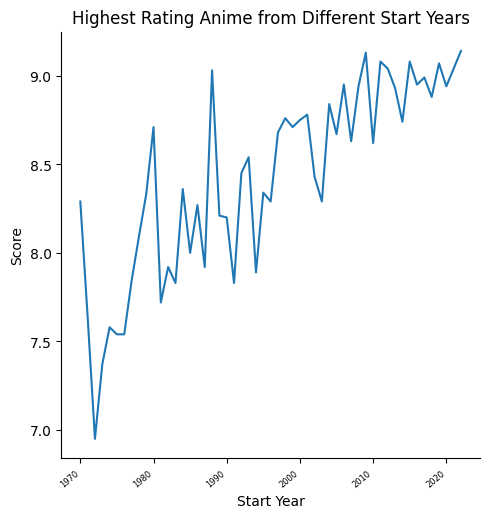

In [22]:
# Visualizing the top-rated anime based on the year it was released using a bar chart 
ffiltered_df = data[['title', 'start_year', 'score']].dropna()
filtered_df['start_year'] = filtered_df['start_year'].astype(int) 
data_by_year = filtered_df.groupby('start_year')['score'].max()
highest_rated_anime = filtered_df.loc[filtered_df.groupby('start_year')['score'].idxmax(), ['title', 'start_year', 'score']]

sns.relplot(data=highest_rated_anime, x='start_year', y='score', kind='line')
plt.xlabel('Start Year')
plt.ylabel('Score')
plt.title('Highest Rating Anime from Different Start Years')
plt.xticks(rotation=40, ha="right", fontsize=6)
plt.savefig('line_plot_highest_rated_anime.png', bbox_inches='tight')
plt.show()

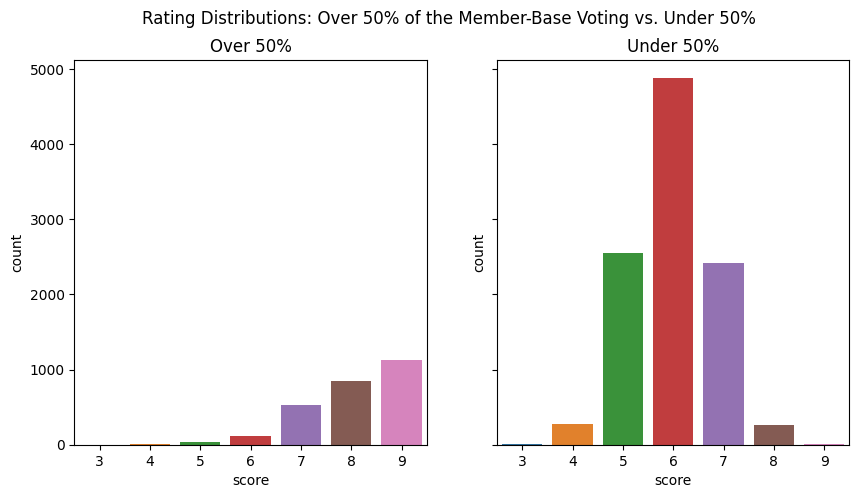

In [7]:
# Visualizing the distribution of ratings comparing loyal fanbases to unloyal - measured by finding the ratio between members
# that have scored the anime and overall number of members.
filtered_data = data[['start_year', 'title', 'score', 'members', 'scored_by']].dropna()
filtered_data = filtered_data.assign(scored_mem_ratio = filtered_data.scored_by/filtered_data.members)
filtered_data['score'] = filtered_data['score'].astype(int)
above_50 = filtered_data[filtered_data['scored_mem_ratio'] >= 0.5]
under_50 = filtered_data[filtered_data['scored_mem_ratio'] < 0.5]

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Rating Distributions: Over 50% of the Member-Base Voting vs. Under 50%')

sns.countplot(ax=axes[0], x='score', data = above_50)
axes[0].set_title('Over 50%')

sns.countplot(ax=axes[1], x='score', data = under_50)
axes[1].set_title('Under 50%')

plt.show()

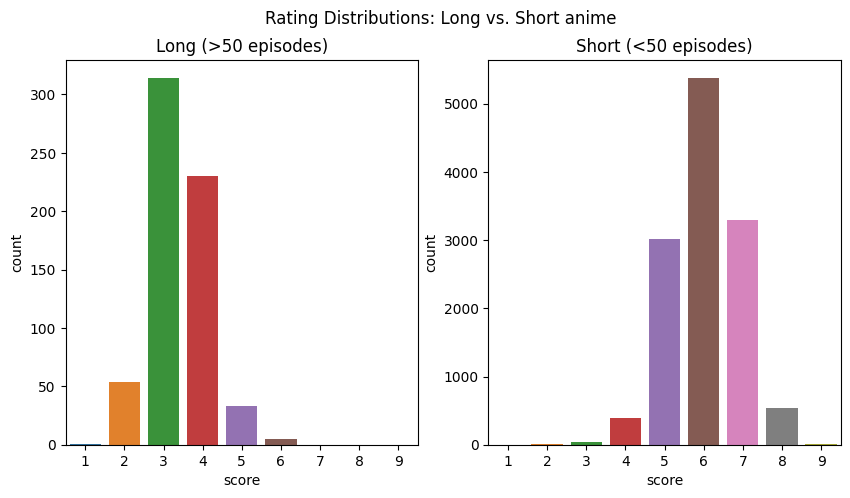

In [8]:
# Visualizing the distribution of ratings comparing long to short anime - An anime is considered long within the dataset if it has
# more than 100 episodes. 
filtered_data_2 = data[['score', 'episodes']].dropna()
filtered_data_2['score'] = filtered_data_2['score'].astype(int)
long_anime = filtered_data_2[filtered_data_2['episodes'] >= 50]
short_anime = filtered_data_2[filtered_data_2['episodes'] < 50]

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
fig.suptitle('Rating Distributions: Long vs. Short anime')

sns.countplot(ax=axes[0], x='score', data = long_anime)
axes[0].set_title('Long (>50 episodes)')

sns.countplot(ax=axes[1], x='score', data = short_anime)
axes[1].set_title('Short (<50 episodes)')

plt.show()

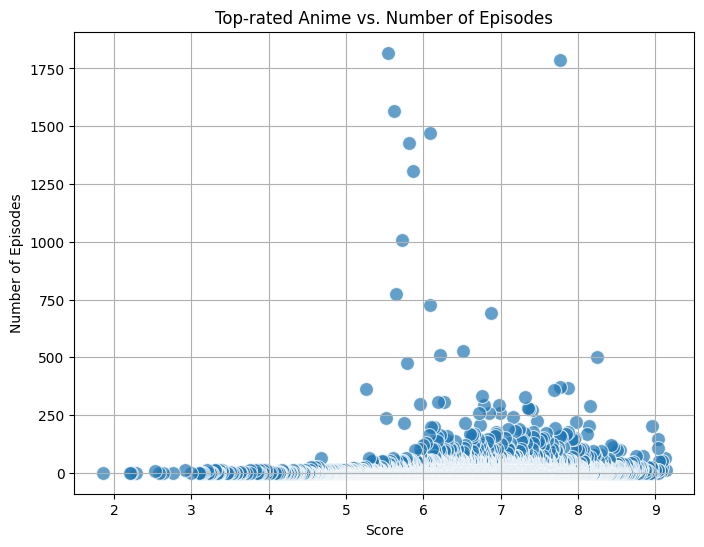

In [18]:
# Visualziing the top-rated anime in comparsion to the number of episdoes the show has. 
filtered_df = data[['title', 'start_year', 'score', 'episodes']]
filtered_df = filtered_df[pd.to_numeric(filtered_df['episodes'], errors='coerce').notnull()]
filtered_df['episodes'] = pd.to_numeric(filtered_df['episodes'])

# Sort the DataFrame by score in descending order
filtered_df = filtered_df.sort_values('score', ascending=False)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='score', y='episodes', s=100, alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Number of Episodes')
plt.title('Top-rated Anime vs. Number of Episodes')
plt.grid(True)
plt.show()
# color them by category, try to get rid of outliers, above 500 
# combination of the two 